Given the probability distributions of job offers and starting salaries for graduates with either a Master's or a Bachelor's degree in Computer Science, what is the expected value of X, the net income over the first four years after accounting for student debt, and which educational path offers a higher expected value?

Simulating the Expected Net Income of CS Graduates: Bachelor's vs. Master's

The random variable X represents the net income over the first four years that a Computer Science graduate receives when applying for software engineering positions, after accounting for student debt.

Simulation process:

A graduate receives a random number of job offers, drawn from the probability distribution of offers specific to their degree.

For each offer, a starting salary is randomly sampled from the salary distribution associated with their degree.

The maximum salary among the offers is selected.

Student debt is subtracted from cumulative earnings over the first four years to calculate net income, which is the outcome of that trial.

After repeating many trials, the expected value of X is calculated as the average net income across all trials. This allows us to estimate which educational path Bachelor's or Master's provides a higher expected net income.

Expected Highest Starting Salary (Bachelor's): $84,496.96
Expected Highest Starting Salary (Master's):   $104,438.02

Expected Net 4-Year Income (Bachelor's): $297,987.84
Expected Net 4-Year Income (Master's):   $357,752.07

Master's degree offers a higher expected net income over 4 years.


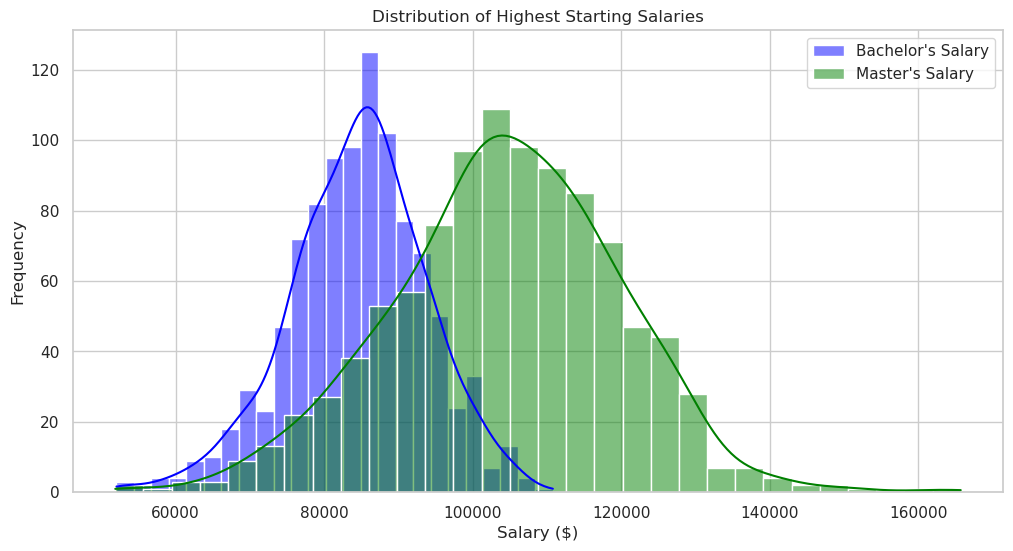

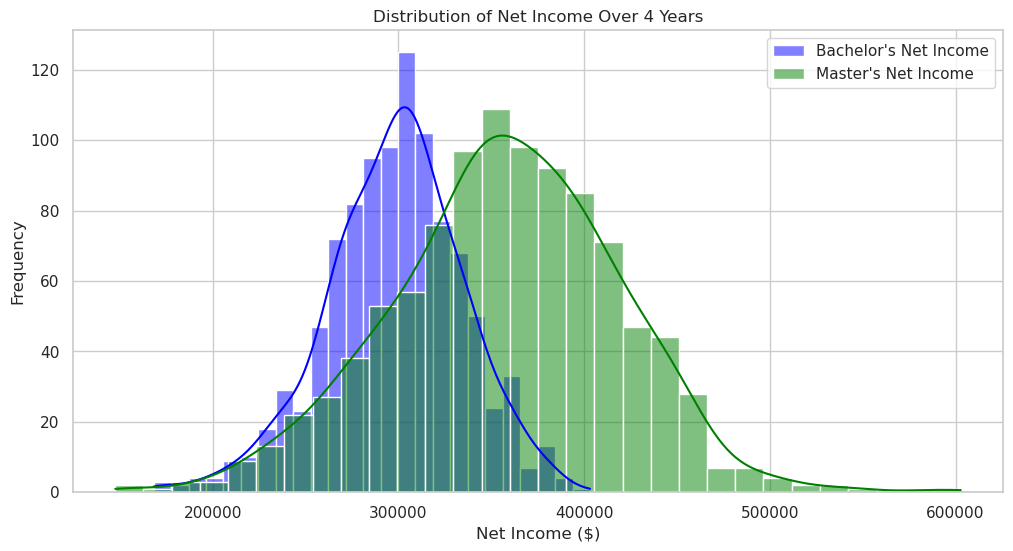

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Simulation Parameters

num_trials = 1000  # Number of simulation trials

# Possible number of job offers
offer_options = [1, 2, 3, 4]

# Probability of receiving each number of offers
offer_probs_bachelor = [0.3, 0.4, 0.2, 0.1]  # more offers on average
offer_probs_master   = [0.5, 0.3, 0.15, 0.05]  # fewer offers but higher salaries

# Salary distributions (normal)
bachelor_mean, bachelor_std = 80000, 10000
master_mean, master_std     = 100000, 15000

# Student debt
bachelor_debt = 40000
master_debt   = 60000

# Number of years to project net income
years = 4

# Simulation Function

def simulate_net_income(mean, std, num_trials, offer_options, offer_probs, debt, years):
    """
    Simulate net income over multiple trials.
    
    Returns:
        max_salaries: highest starting salary per trial
        net_incomes: net income over 'years' after subtracting debt
    """
    max_salaries = []
    net_incomes = []
    
    for _ in range(num_trials):
        # Random number of offers
        num_offers = np.random.choice(offer_options, p=offer_probs)
        # Random salaries for each offer
        offers = np.random.normal(mean, std, num_offers)
        # Maximum salary
        highest_salary = np.max(offers)
        max_salaries.append(highest_salary)
        # Net income over 'years' after debt
        net_income = highest_salary * years - debt
        net_incomes.append(net_income)
    
    return np.array(max_salaries), np.array(net_incomes)

# Run Simulations

bachelor_max, bachelor_net = simulate_net_income(
    bachelor_mean, bachelor_std, num_trials, offer_options, offer_probs_bachelor, bachelor_debt, years
)

master_max, master_net = simulate_net_income(
    master_mean, master_std, num_trials, offer_options, offer_probs_master, master_debt, years
)

# Calculate Expected Values

expected_bachelor_salary = np.mean(bachelor_max)
expected_master_salary   = np.mean(master_max)

expected_bachelor_net = np.mean(bachelor_net)
expected_master_net   = np.mean(master_net)

print(f"Expected Highest Starting Salary (Bachelor's): ${expected_bachelor_salary:,.2f}")
print(f"Expected Highest Starting Salary (Master's):   ${expected_master_salary:,.2f}\n")

print(f"Expected Net 4-Year Income (Bachelor's): ${expected_bachelor_net:,.2f}")
print(f"Expected Net 4-Year Income (Master's):   ${expected_master_net:,.2f}\n")

# Comparison
if expected_master_net > expected_bachelor_net:
    print("Master's degree offers a higher expected net income over 4 years.")
else:
    print("Bachelor's degree offers a higher expected net income over 4 years.")

# Visualization
sns.set(style="whitegrid")

# Plot highest starting salaries
plt.figure(figsize=(12,6))
sns.histplot(bachelor_max, color='blue', label="Bachelor's Salary", kde=True)
sns.histplot(master_max, color='green', label="Master's Salary", kde=True)
plt.title("Distribution of Highest Starting Salaries")
plt.xlabel("Salary ($)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Plot net income over 4 years
plt.figure(figsize=(12,6))
sns.histplot(bachelor_net, color='blue', label="Bachelor's Net Income", kde=True)
sns.histplot(master_net, color='green', label="Master's Net Income", kde=True)
plt.title("Distribution of Net Income Over 4 Years")
plt.xlabel("Net Income ($)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Based on our simulation of 1000 trials, we estimated the expected value of the highest starting salary and the expected net income over the first four years for Computer Science graduates with either a Bachelor's or a Master's degree.

The results show that Master's graduates tend to receive higher starting salaries on average, even though they may receive fewer job offers.

After accounting for student debt and projecting earnings over four years, Master's graduates also have higher expected net income than Bachelor's graduates.

While individual outcomes vary due to randomness in offers and salaries, the expected value clearly favors the Master's path.

Conclusion: Despite the additional time and cost of a Master's degree, the higher salaries generally outweigh the debt, making it the degree that offers a higher expected net financial outcome in the early years of a software engineering career.